In [1]:
import matplotlib.pyplot as plt
import pandas as pd 
import numpy as np

In [2]:
# set data path
DATA_PATH ='UCI HAR Dataset/'
TRAIN_PATH = DATA_PATH + 'train/'
TEST_PATH = DATA_PATH + 'test/'

In [33]:
# load traininig data
X_train = pd.read_csv(TRAIN_PATH + 'X_train.txt', sep='\s+', header=None)
y_train = pd.read_csv(TRAIN_PATH + 'y_train.txt', sep='\s+', header=None)

In [34]:
# shape of training data
print('X_train shape: ', X_train.shape)

X_train shape:  (7352, 561)


In [35]:
# add feature names to training data
features = pd.read_csv(DATA_PATH + 'features.txt', sep='\s+', header=None)
X_train.columns = features[1]
X_train.head()

1,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-meanFreq(),fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)"
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.074323,-0.298676,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,0.158075,-0.595051,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,0.414503,-0.390748,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,0.404573,-0.117290,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,0.087753,-0.351471,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892


In [36]:
# train a classifier
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=100, max_depth=2, random_state=0)
clf.fit(X_train, y_train.values.ravel())

RandomForestClassifier(max_depth=2, random_state=0)

In [37]:
# load test data
X_test = pd.read_csv(TEST_PATH + 'X_test.txt', sep='\s+', header=None)
X_test.columns = features[1]
y_test = pd.read_csv(TEST_PATH + 'y_test.txt', sep='\s+', header=None)

In [8]:
# make predictions 
y_pred = clf.predict(X_test)

In [9]:
# evaluate model accuracy 
from sklearn.metrics import accuracy_score
print('Accuracy: ', accuracy_score(y_test, y_pred))

Accuracy:  0.7176789955887343


Perform grid-search of hyperparameters for the model

In [10]:
# grid search of hyperparameters
from sklearn.model_selection import GridSearchCV
param_grid = {
    'n_estimators': [90, 100, 110, 150],
    'max_depth': [ 5, 6, 7, 8]

}
grid_search = GridSearchCV(estimator=clf, param_grid=param_grid, cv=3, n_jobs=-1, verbose=3)
grid_search.fit(X_train, y_train.values.ravel())

Fitting 3 folds for each of 16 candidates, totalling 48 fits
[CV 1/3] END ......max_depth=5, n_estimators=90;, score=0.893 total time=   8.0s
[CV 3/3] END ......max_depth=5, n_estimators=90;, score=0.906 total time=   8.0s
[CV 2/3] END ......max_depth=5, n_estimators=90;, score=0.902 total time=   8.1s
[CV 1/3] END .....max_depth=5, n_estimators=100;, score=0.893 total time=   8.9s
[CV 2/3] END .....max_depth=5, n_estimators=100;, score=0.902 total time=   8.1s
[CV 3/3] END .....max_depth=5, n_estimators=100;, score=0.907 total time=   8.2s
[CV 1/3] END .....max_depth=5, n_estimators=110;, score=0.895 total time=   9.0s
[CV 2/3] END .....max_depth=5, n_estimators=110;, score=0.904 total time=   8.9s
[CV 3/3] END .....max_depth=5, n_estimators=110;, score=0.909 total time=   8.9s
[CV 1/3] END .....max_depth=5, n_estimators=150;, score=0.894 total time=  12.0s
[CV 2/3] END .....max_depth=5, n_estimators=150;, score=0.903 total time=  12.0s
[CV 3/3] END .....max_depth=5, n_estimators=150;

GridSearchCV(cv=3,
             estimator=RandomForestClassifier(max_depth=2, random_state=0),
             n_jobs=-1,
             param_grid={'max_depth': [5, 6, 7, 8],
                         'n_estimators': [90, 100, 110, 150]},
             verbose=3)

In [11]:
# use best parameters
best_clf = grid_search.best_estimator_
best_clf.fit(X_train, y_train.values.ravel())
y_pred = best_clf.predict(X_test)
print('Accuracy: ', accuracy_score(y_test, y_pred))

Accuracy:  0.9195792331184255


In [12]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.87      0.98      0.92       496
           2       0.90      0.90      0.90       471
           3       0.96      0.82      0.89       420
           4       0.92      0.87      0.89       491
           5       0.88      0.93      0.90       532
           6       1.00      1.00      1.00       537

    accuracy                           0.92      2947
   macro avg       0.92      0.92      0.92      2947
weighted avg       0.92      0.92      0.92      2947



In [13]:
# check the number of estimators of the best model 
print(best_clf.n_estimators)

# check the max depth of the best model
print(best_clf.max_depth)

100
8


In [14]:
# check the number of estimators of the best model 
print(clf.n_estimators)

# check the max depth of the best model
print(clf.max_depth)

100
2


<BarContainer object of 561 artists>

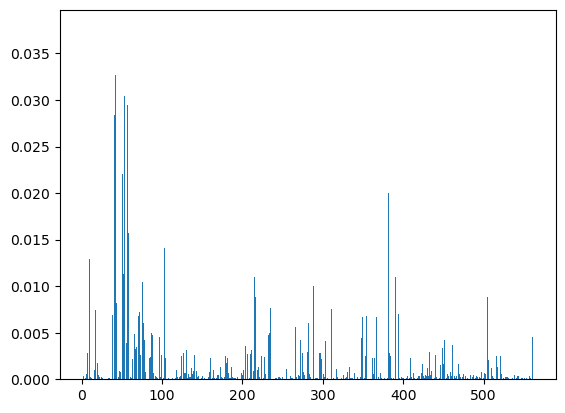

In [15]:
plt.bar(np.arange(1, X_train.shape[1]+1), best_clf.feature_importances_)

In [27]:
# get importances greter than 0.01
importances = best_clf.feature_importances_
indices = np.where(importances > 0.02)[0]
print(indices)


[ 40  41  49  50  52  56 558 559]


In [39]:
# train svm
from sklearn.svm import SVC
svm_clf = SVC(gamma='auto')
svm_clf.fit(X_train, y_train.values.ravel())

# make predictions
y_pred = svm_clf.predict(X_test)

# report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.94      0.99      0.97       496
           2       0.94      0.96      0.95       471
           3       0.98      0.90      0.94       420
           4       0.91      0.86      0.88       491
           5       0.88      0.92      0.90       532
           6       1.00      1.00      1.00       537

    accuracy                           0.94      2947
   macro avg       0.94      0.94      0.94      2947
weighted avg       0.94      0.94      0.94      2947

